# Classification of Heart Disease Diagnosis From Predictor Variables

<font color = green>
    
#### Can age, resting blood pressure, cholesterol level, maximum heart rate, and depression induced by exercise relative to rest accurately predict the presence of heart disease using KNN classification?

<font color = darkblue>
    
## Introduction

<font color = black>

A slow and painful spiral culminating in the malfunction of the most crucial organ in the human body: heart disease. Using heart disease data provided by the Cleveland Clinic Foundation, the aim of this project is to create a k-nearest neighbors algorithm which is able to classify the diagnosis of heart disease based on 5 predictor variables.

<font color = darkblue>

## Preliminary Exploratory Data Analysis

<font color = green>

### *Loading the Dataset*

<font color = black>    
    
Firstly, libraries must be imported, and the data needs to be read by the R program.

In [2]:
# import libraries needed
library(tidyverse)
library(repr)
library(rvest)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

In [3]:
# read the dataset for heart disease

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data <- as_tibble(read.table(url, sep = ",", header = FALSE, na.strings = "?"))

# display the data
heart_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


<font color = darkyellow>

*Table 1: Original heart disease data downloaded from the Cleveland Database.*

It is important to note that the column V14 refers to a patient's heart disease diagnosis. It is a non-
variable, consisting of values 1-4, with 1 representing a negative diagnosis, while 2-4 represents a positive diagnosis. 

<font color = green>

### *Cleaning and Wrangling the Dataset*

<font color = black>   
Column names should be added for easy readability and understandability. 

In [4]:
# add column names
colnames(heart_data) <- c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_electrocardiographic", "max_heart_rate", "exercise_induced_angina", "depression", "peak_exercise", "number_vessels", "normality", "heart_disease_diagnosis")

head(heart_data)

age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,depression,peak_exercise,number_vessels,normality,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


<font color = darkyellow>

*Table 2.1: Addition of column labels to heart disease data.*

Not all columns will be used, as this classification model will only use predictor variables that are continuous.

In [5]:
# only keep select columns
heart_data <- heart_data |>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, depression, heart_disease_diagnosis)

heart_data

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,145,233,150,2.3,0
67,160,286,108,1.5,2
67,120,229,129,2.6,1
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,1.2,3
57,130,236,174,0.0,1
38,138,175,173,0.0,0


<font color = darkyellow>
    
*Table 2.2: Heart disease data with only chosen columns kept.*

Additionally, the heart disease diagnosis column will return either positive or negative, rather than numbers from 1-4, in order to improve understandability. 

In [6]:
# mutate column 14 to be more understandable by readers
heart_data <- heart_data |>
    mutate(heart_disease_diagnosis = case_when(heart_disease_diagnosis == 0 ~ "negative",
                                heart_disease_diagnosis == 1 ~ "positive",
                                heart_disease_diagnosis == 2 ~ "positive",
                                heart_disease_diagnosis == 3 ~ "positive",
                                heart_disease_diagnosis == 4 ~ "positive"))
heart_data

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,145,233,150,2.3,negative
67,160,286,108,1.5,positive
67,120,229,129,2.6,positive
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,1.2,positive
57,130,236,174,0.0,positive
38,138,175,173,0.0,negative


<font color = darkyellow>

*Table 2.3: Heart disease data with the alteration of values for readability.*

 <font color = green>

### *Splitting the Data*

<font color = black>

Exploratory data analysis will only be performed on the training data set, thus, 75% of the data will be in the training set, while the other 25% will be used as the testing set. 
    
The seed set will remain constant throughout the entirety of the project. 

In [7]:
set.seed(9898)

# split into testing and training data
heart_data_split <- initial_split(heart_data, prop = 0.75, strata = heart_disease_diagnosis)
heart_data_training_set <- training(heart_data_split)
heart_data_testing_set <- testing(heart_data_split)

In [8]:
# display training and testing data sets
heart_data_training_set

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,145,233,150,2.3,negative
37,130,250,187,3.5,negative
41,130,204,172,1.4,negative
⋮,⋮,⋮,⋮,⋮,⋮
44,120,169,144,2.8,positive
63,140,187,144,4.0,positive
57,130,236,174,0.0,positive


<font color = darkyellow>

*Table 3.1.1: Display of heart disease data training set.*

In [9]:
heart_data_testing_set

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
67,160,286,108,1.5,positive
56,130,256,142,0.6,positive
52,172,199,162,0.5,negative
⋮,⋮,⋮,⋮,⋮,⋮
45,110,264,132,1.2,positive
68,144,193,141,3.4,positive
57,130,131,115,1.2,positive


<font color = darkyellow>

*Table 3.1.2: Display of heart disease data testing set.*

<font color = green>

### *Number of Observations in Each Class*

<font color = black>
    
We will compute the number of observations in the two classification classes, to gain an idea as to how the data is distributed.

In [10]:
# number of observations in each class for prediction variables
diagnoses_distributions <- heart_data_training_set |>
    group_by(heart_disease_diagnosis) |>
    summarize(count = n())

diagnoses_distributions

heart_disease_diagnosis,count
<chr>,<int>
negative,123
positive,104


<font color = darkyellow>

*Table 3.2: Distribution of positive and negative diagnoses in the training set.*

The number of negative and positive diagnoses are relatively similar, meaning that our results are less influenced by the majority of a certain class.

<font color = green>

### *Missing Data*
<font color = black>
    
It is important to note whether any missing data present may affect the classification model. 


In [11]:
# count rows with missing data
missing_data <- sum(is.na(heart_data_training_set $ age)) |>
    sum(is.na(heart_data_training_set $ resting_blood_pressure)) |>
    sum(is.na(heart_data_training_set $ cholesterol)) |>
    sum(is.na(heart_data_training_set $ max_heart_rate)) |>
    sum(is.na(heart_data_training_set $ depression)) |>
    sum(is.na(heart_data_training_set $ heart_disease_diagnosis))

missing_data

[1] 0

As shown above, there is no missing data which may influence classification predictions in the training set. 

<font color = green>

### *Means of Predictor Variables*

In [12]:
# find the mean of each variable used for predictions
heart_data_mean_values <- heart_data_training_set |>
    summarize(across(age:depression, mean))

heart_data_mean_values

age,resting_blood_pressure,cholesterol,max_heart_rate,depression
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.44053,131.3833,248.1542,150.0881,1.103084


<font color = darkyellow>

*Table 3.3: Table showing mean values for all 5 predictor variables.*

<font color = darkblue>

## Visualizing Preliminary Exploratory Data

<font color = green>
    
### *Predictor Variables vs Heart Disease Classification*
   
<font color = black>
    
Each predictor variable will be along the x axis, while the number of diagnoses in relation to the variable will be on the y axis, in scatterplot form. All points will be coloured in terms of diagnosis status.

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


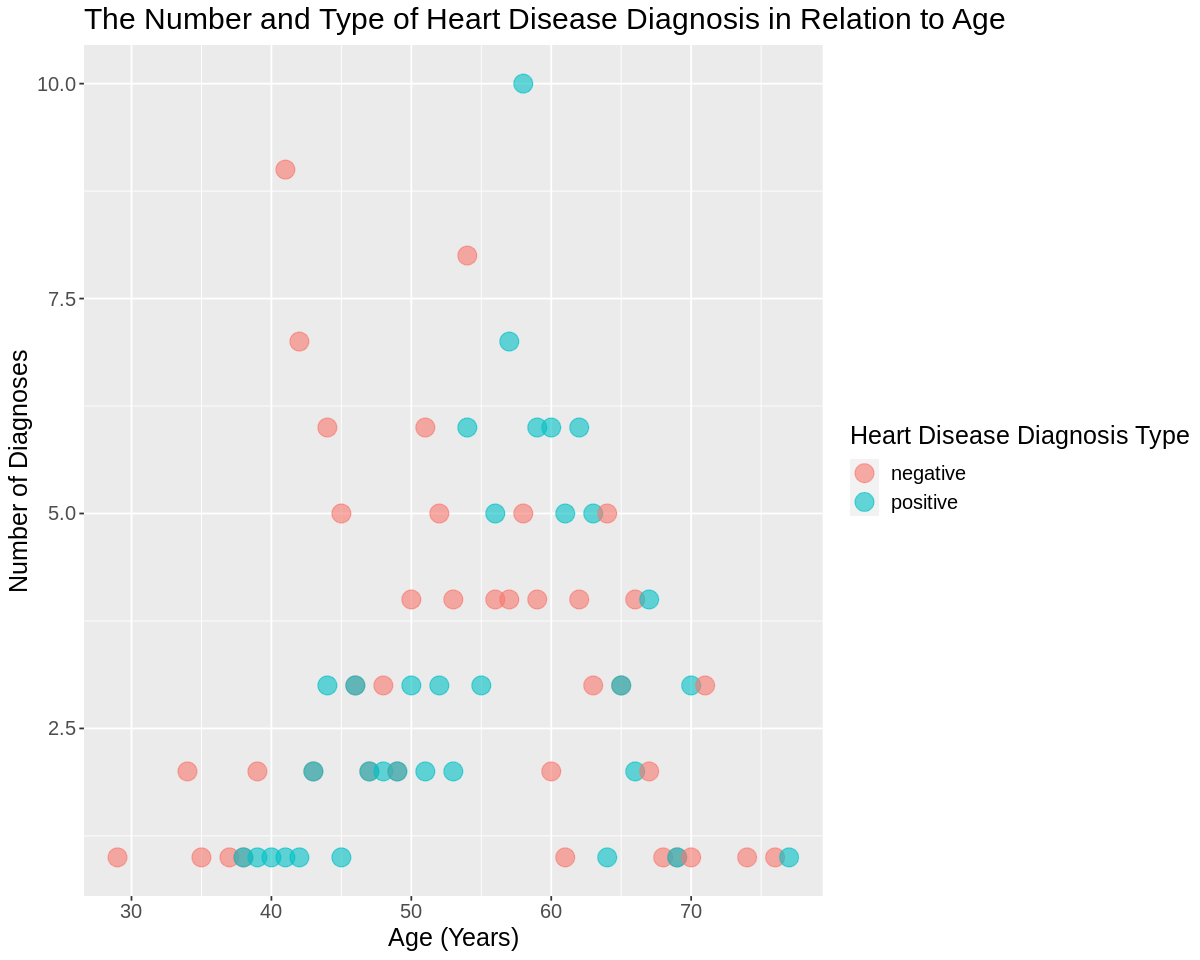

In [13]:
options(repr.plot.width = 10, repr.plot.height = 8)

sort_age_diagnosis <- heart_data_training_set |>
    select(age, heart_disease_diagnosis) |>
    group_by(age, heart_disease_diagnosis) |>
    summarize(count = n()) 

age_vs_diagnosis_plot <- sort_age_diagnosis |>
    ggplot(aes(x = age, y = count, color = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Age (Years)", y = "Number of Diagnoses", color = "Heart Disease Diagnosis Type") +
    ggtitle("The Number and Type of Heart Disease Diagnosis in Relation to Age") +
    theme(text = element_text(size = 15))
age_vs_diagnosis_plot

<font color = darkyellow>

*Graph 4.1.1: Scatterplot the relationship between the number and type of diagnoses and age.*

`summarise()` has grouped output by 'resting_blood_pressure'. You can override
using the `.groups` argument.


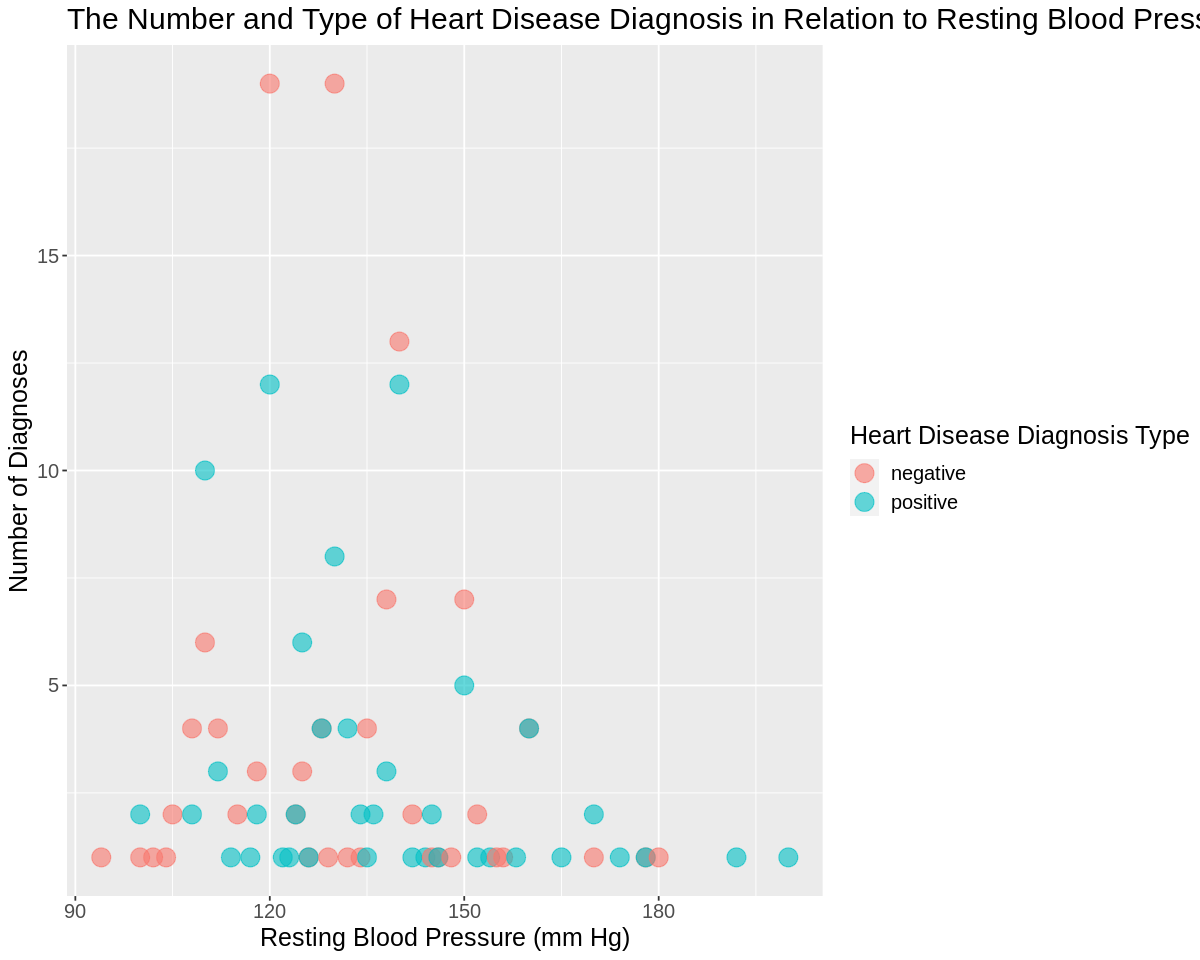

In [14]:
sort_resting_blood_pressure_diagnosis <- heart_data_training_set |>
    select(resting_blood_pressure, heart_disease_diagnosis) |>
    group_by(resting_blood_pressure, heart_disease_diagnosis) |>
    summarize(count = n())

resting_blood_pressure_vs_diagnosis_plot <- sort_resting_blood_pressure_diagnosis |>
    ggplot(aes(x = resting_blood_pressure, y = count, color = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Resting Blood Pressure (mm Hg)", y = "Number of Diagnoses", color = "Heart Disease Diagnosis Type") +
    ggtitle("The Number and Type of Heart Disease Diagnosis in Relation to Resting Blood Pressure") +
    theme(text = element_text(size = 15))
resting_blood_pressure_vs_diagnosis_plot

<font color = darkyellow>

*Graph 4.1.2: Scatterplot the relationship between the number and type of diagnoses and resting blood pressure.*

`summarise()` has grouped output by 'cholesterol'. You can override using the
`.groups` argument.


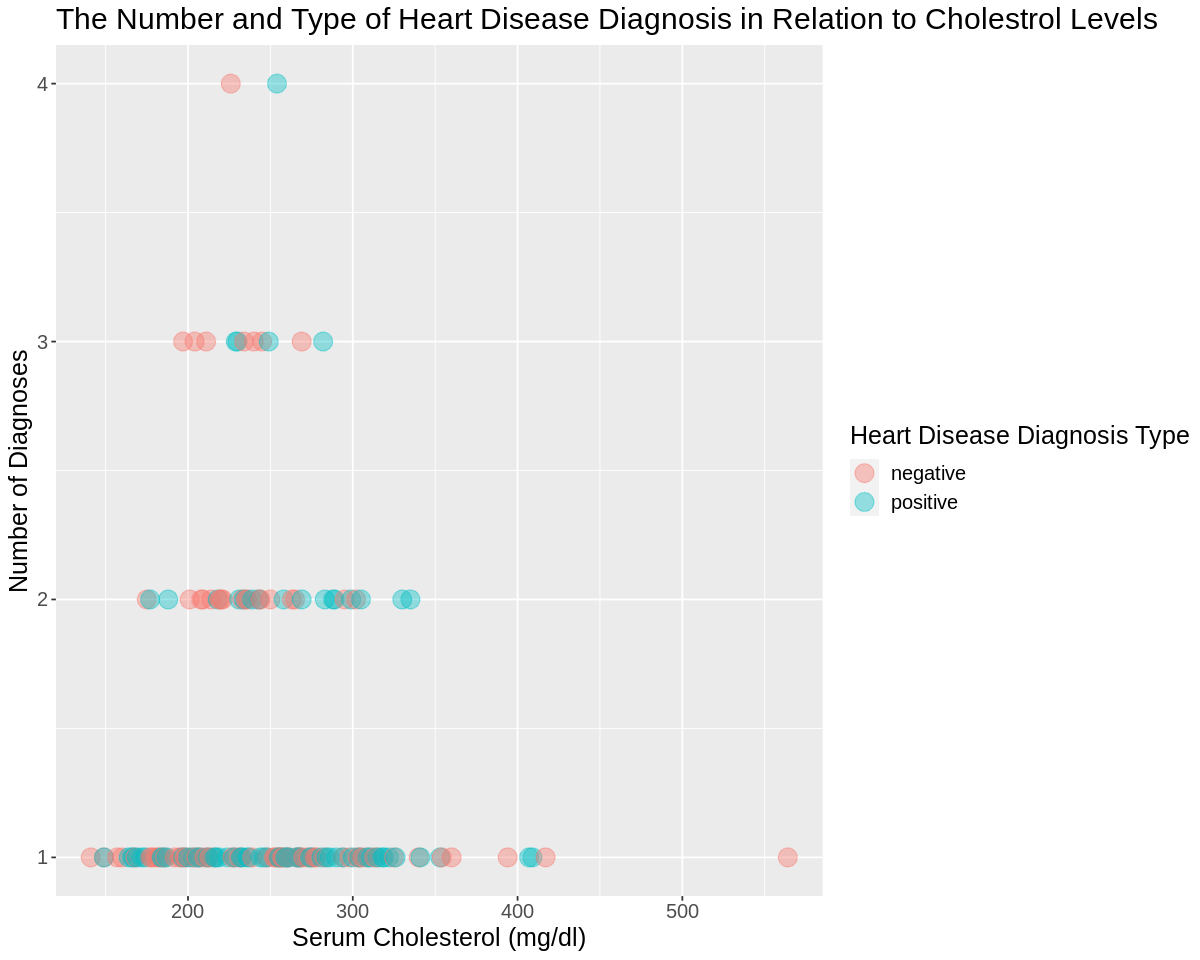

In [15]:
sort_cholesterol_diagnosis <- heart_data_training_set |>
    select(cholesterol, heart_disease_diagnosis) |>
    group_by(cholesterol, heart_disease_diagnosis) |>
    summarize(count = n())

cholesterol_vs_diagnosis_plot <- sort_cholesterol_diagnosis |>
    ggplot(aes(x = cholesterol, y = count, color = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.4) +
    labs(x = "Serum Cholesterol (mg/dl)", y = "Number of Diagnoses", color = "Heart Disease Diagnosis Type") +
    ggtitle("The Number and Type of Heart Disease Diagnosis in Relation to Cholestrol Levels") +
    theme(text = element_text(size = 15))
cholesterol_vs_diagnosis_plot

<font color = darkyellow>

*Graph 4.1.3: Scatterplot the relationship between the number and type of diagnoses and cholesterol level.*

`summarise()` has grouped output by 'max_heart_rate'. You can override using
the `.groups` argument.


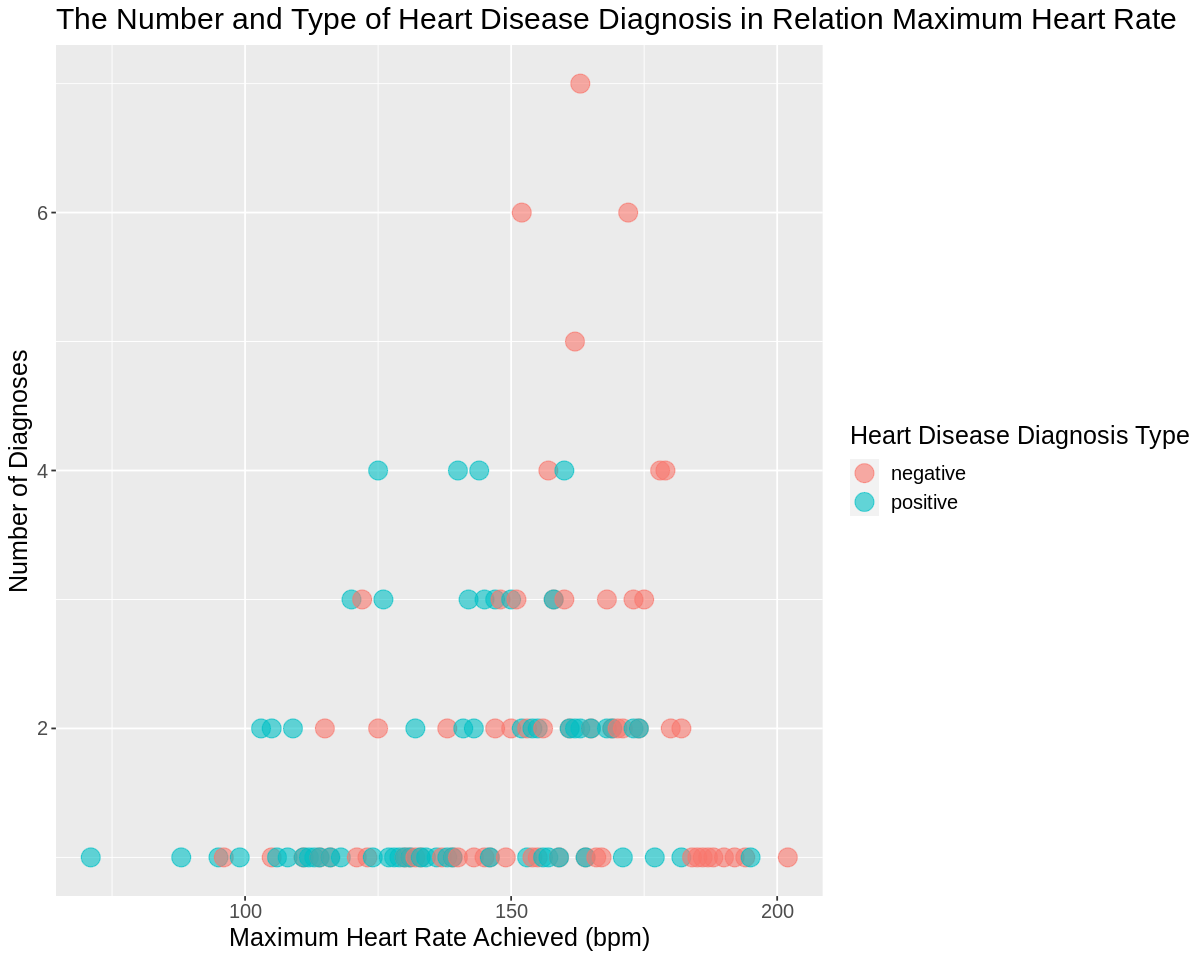

In [16]:
sort_max_heart_rate_diagnosis <- heart_data_training_set |>
    select(max_heart_rate, heart_disease_diagnosis) |>
    group_by(max_heart_rate, heart_disease_diagnosis) |>
    summarize(count = n())

max_heart_rate_vs_diagnosis_plot <- sort_max_heart_rate_diagnosis |>
    ggplot(aes(x = max_heart_rate, y = count, color = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Maximum Heart Rate Achieved (bpm)", y = "Number of Diagnoses", color = "Heart Disease Diagnosis Type") +
    ggtitle("The Number and Type of Heart Disease Diagnosis in Relation Maximum Heart Rate") +
    theme(text = element_text(size = 15))
max_heart_rate_vs_diagnosis_plot

<font color = darkyellow>

*Graph 4.1.4: Scatterplot the relationship between the number and type of diagnoses and maximum heart rate.*

`summarise()` has grouped output by 'depression'. You can override using the
`.groups` argument.


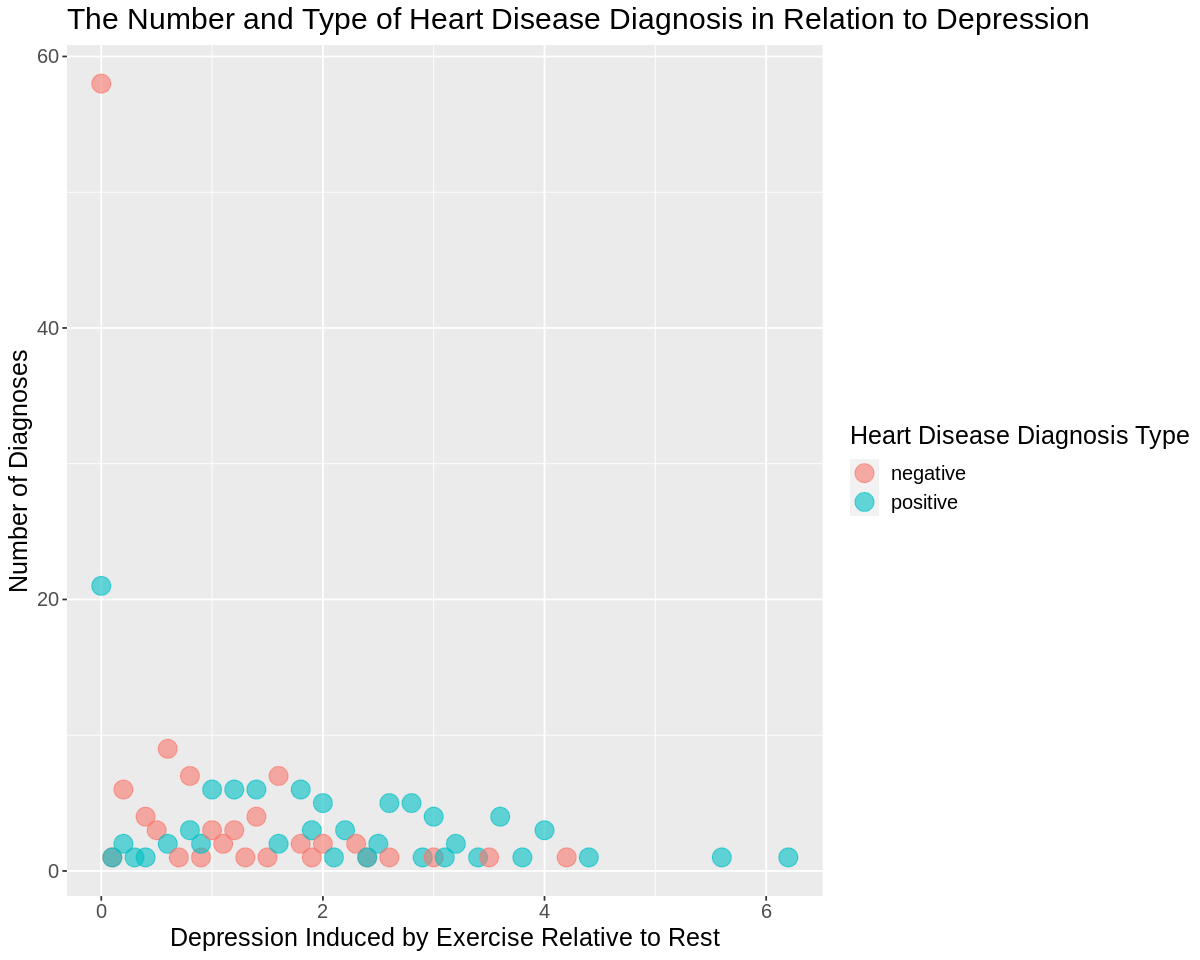

In [17]:
sort_depression_diagnosis <- heart_data_training_set |>
    select(depression, heart_disease_diagnosis) |>
    group_by(depression, heart_disease_diagnosis) |>
    summarize(count = n()) 

depression_vs_diagnosis_plot <- sort_depression_diagnosis |>
    ggplot(aes(x = depression, y = count, color = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Depression Induced by Exercise Relative to Rest", y = "Number of Diagnoses", color = "Heart Disease Diagnosis Type") +
    ggtitle("The Number and Type of Heart Disease Diagnosis in Relation to Depression") +
    theme(text = element_text(size = 15))
depression_vs_diagnosis_plot

<font color = darkyellow>

*Graph 4.1.5: Scatterplot the relationship between the number and type of diagnoses and depression induced by exercise relative to rest.*

The above 5 bar graphs display the relationship between the number of diagnoses and each predictor variable, with colors differentiating between negative and positive diagnoses.

<font color = green>
    
### *Distribution of Each Predictor Variable*
   
<font color = black>
    
The following boxplots displays the distribution of each predictor variable, including the average and outliers in the training data set. 

In [18]:
heart_data_training_set_adjusted <- heart_data_training_set |>
    select(-heart_disease_diagnosis) |>
    pivot_longer(cols = age:depression,
                names_to = "variable",
                values_to = "value")

heart_data_training_set_adjusted

variable,value
<chr>,<dbl>
age,63
resting_blood_pressure,145
cholesterol,233
⋮,⋮
cholesterol,236
max_heart_rate,174
depression,0


<font color = darkyellow>

*Table 5.1: Heart data training set wrangled in order to create boxplots.*

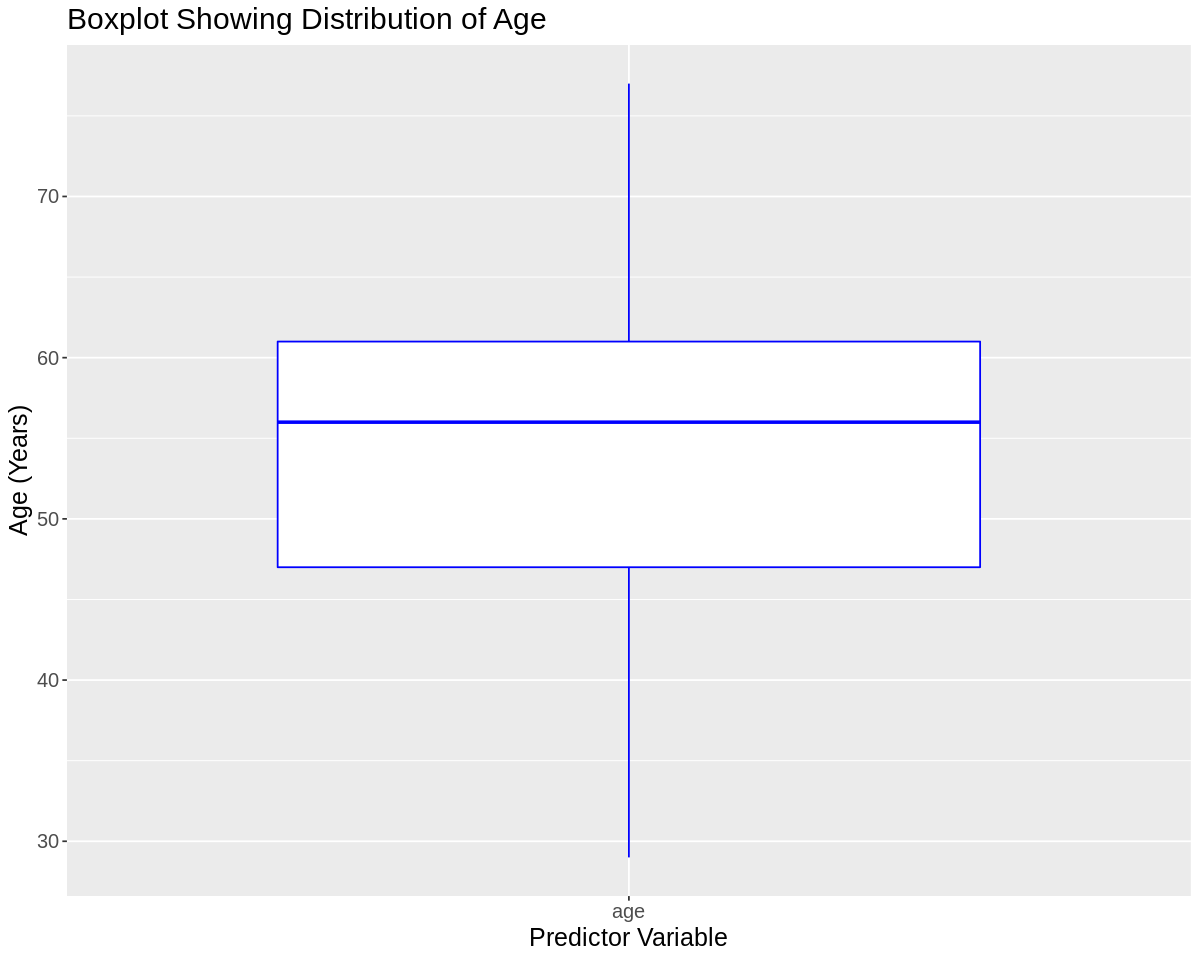

In [19]:
options(repr.plot.width = 10, repr.plot.height = 8)

age_variable_boxplot <- heart_data_training_set_adjusted |>
    filter(variable == "age") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot(color = "blue") +
    labs(x = "Predictor Variable", y = "Age (Years)") +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplot Showing Distribution of Age")

age_variable_boxplot

<font color = darkyellow>

*Graph 5.2.1: Boxplot showing the distribution of the age variable.*

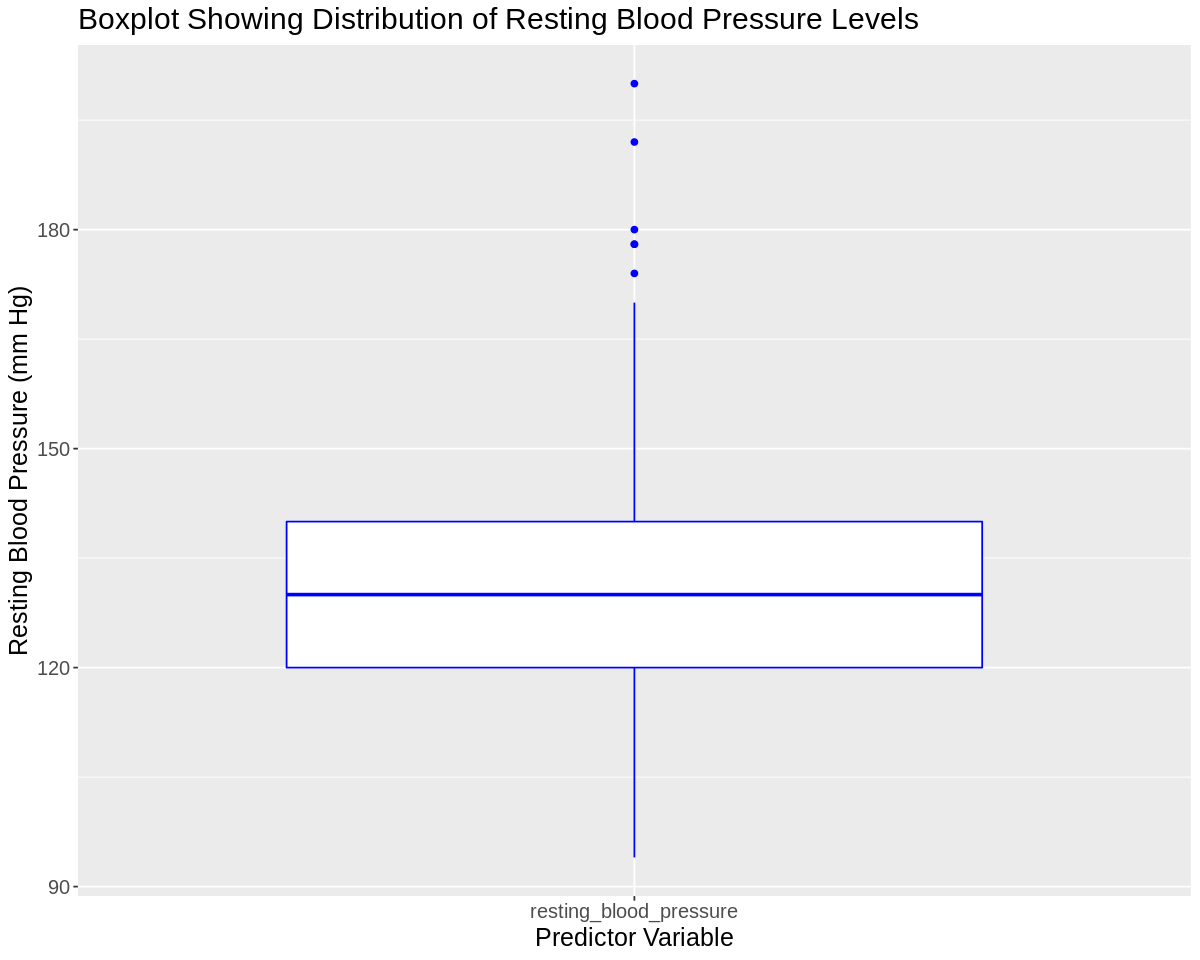

In [20]:
resting_blood_pressure_variable_boxplot <- heart_data_training_set_adjusted |>
    filter(variable == "resting_blood_pressure") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot(color = "blue") +
    labs(x = "Predictor Variable", y = "Resting Blood Pressure (mm Hg)") +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplot Showing Distribution of Resting Blood Pressure Levels")

resting_blood_pressure_variable_boxplot

<font color = darkyellow>

*Graph 5.2.2: Boxplot showing the distribution of the resting blood pressure variable.*

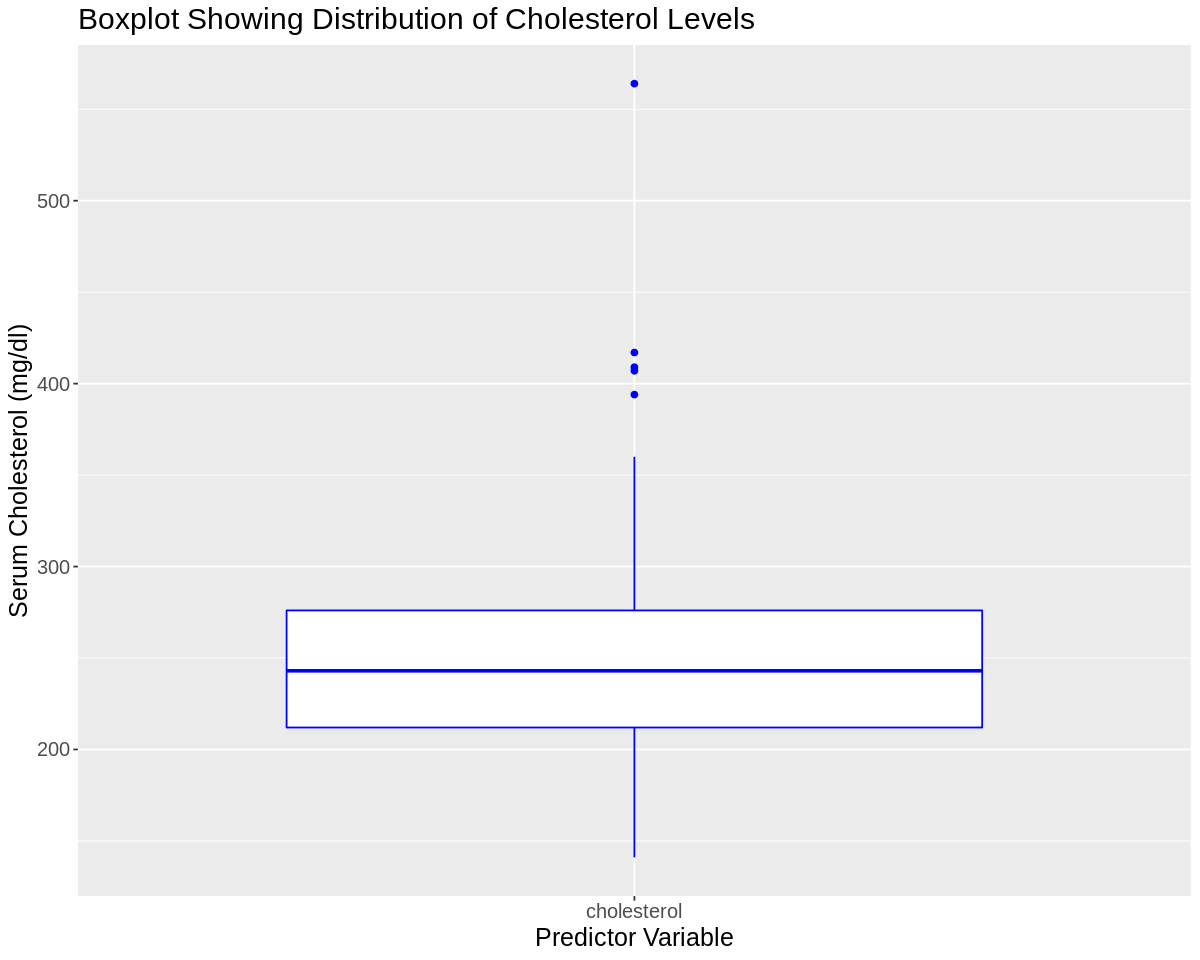

In [21]:
cholesterol_variable_boxplot <- heart_data_training_set_adjusted |>
    filter(variable == "cholesterol") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot(color = "blue") +
    labs(x = "Predictor Variable", y = "Serum Cholesterol (mg/dl)") +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplot Showing Distribution of Cholesterol Levels")

cholesterol_variable_boxplot

<font color = darkyellow>

*Graph 5.2.3: Boxplot showing the distribution of the cholesterol level variable.*

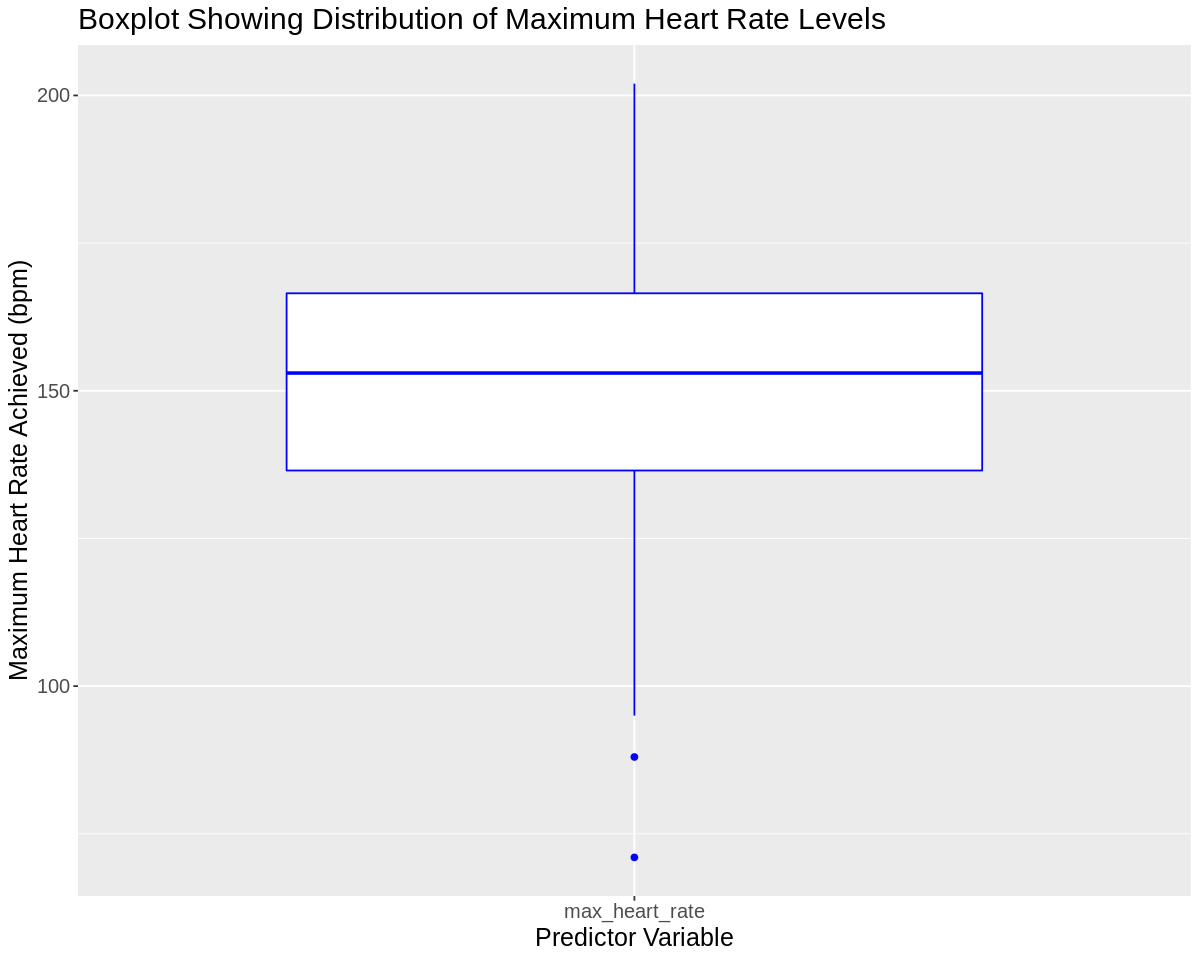

In [22]:
max_heart_rate_variable_boxplot <- heart_data_training_set_adjusted |>
    filter(variable == "max_heart_rate") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot(color = "blue") +
    labs(x = "Predictor Variable", y = "Maximum Heart Rate Achieved (bpm)") +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplot Showing Distribution of Maximum Heart Rate Levels")

max_heart_rate_variable_boxplot

<font color = darkyellow>

*Graph 5.2.4: Boxplot showing the distribution of the maximum heart rate variable.*

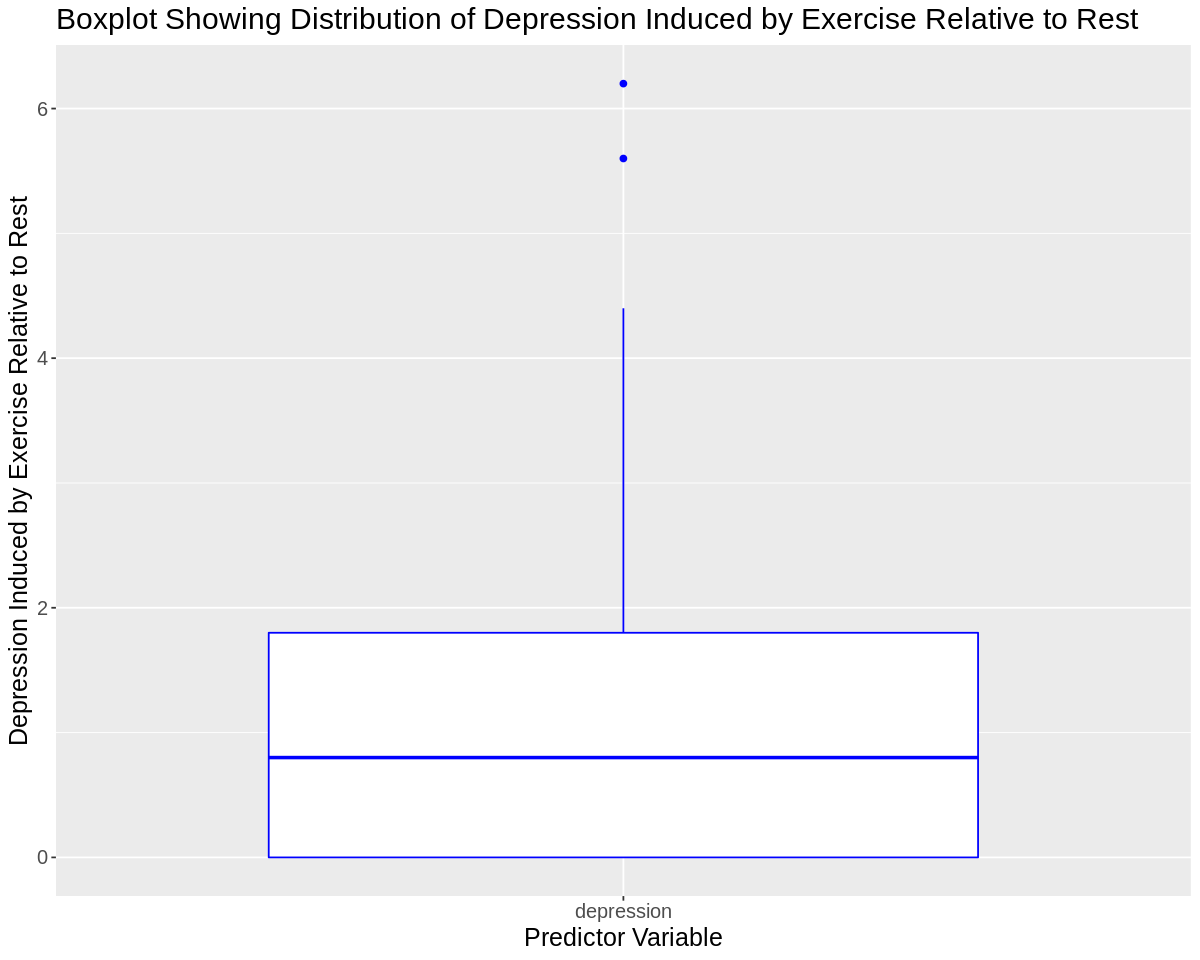

In [23]:
depression_variable_boxplot <- heart_data_training_set_adjusted |>
    filter(variable == "depression") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot(color = "blue") +
    labs(x = "Predictor Variable", y = "Depression Induced by Exercise Relative to Rest") +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplot Showing Distribution of Depression Induced by Exercise Relative to Rest")

depression_variable_boxplot

<font color = darkyellow>

*Graph 5.2.5: Boxplot showing the distribution of the depression induced by exercise relative to rest variable.*

<font color = green>
    
### *Summary of Preliminary Exploratory Data Analysis*
   
<font color = black>
    
From the preliminary exploratory data analysis, the data is now clean and wrangled, and has been split into a training and testing set. From our visualizations, we have a better understanding as to how the dataset values are spread out. Thus, the training data set is ready for a classification model to be made. 

<font color = darkblue>

## Methods

<font color = green>
    
### *Planned Analysis*
   
<font color = black>
    
In order to predict the diagnosis of future patients, we are going to be using continuous variables as predictors, namely age, resting blood pressure, cholesterol, maximum heart rate, depression induced by exercise relative to rest. The use of continuous variables is important for standardizing data. To ensure the accuracy of our prediction model, we will implement a five-fold cross-validation and the tuning method on our algorithm, increasing the mitigation of outlying data in the best possible version of our K-nearest neighbors model.  Visualizing the results will be done through a calculated confusion matrix and accuracy measurements, to determine the success of our classification model. 

<font color = green>
    
### *Outcomes and Significance*
   
<font color = black>
    
We expect to be able to classify an individual’s heart disease diagnosis as either positive or negative, based on 5 predictive variables. Such findings could be hugely beneficial to medical centers in need of a quick, but also reliable method of conducting a preliminary analysis on patients. Moreover, the simplicity of this model allows for the general public to assess their risk for heart disease in an effective manner. 

<font color = green>
    
### *Performing the Data Analysis*
   
<font color = black>
    
We can now start developing our K-nearest neighbors classification model.

<font color = purple>

#### *Initial Look into the Training Set*

<font color = black>
    
We will take an initial look inside the training data set in which we will use to train our model.

In [24]:
heart_proportions <- heart_data_training_set |>
    group_by(heart_disease_diagnosis) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(heart_data_training_set))
heart_proportions

heart_disease_diagnosis,n,percent
<chr>,<int>,<dbl>
negative,123,54.18502
positive,104,45.81498


<font color = darkyellow>

*Graph 6.1: Percentage of positive and negative heart disease diagnoses in the heart disease training set.*

The figure above depicts the split of negative heart disease diagnoses to positive heart disease diagnoses.

<font color = purple>

#### *Preprocessing the Training Data*

<font color = black>
    
We will modify the variables in the training data so each predictor has a center of 0 and standard deviation of 1. This is done so that all predictors have equally weighted effects on the model.

In [25]:
heart_recipe <- recipe(heart_disease_diagnosis ~., data = heart_data_training_set) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
heart_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

<font color = purple>

#### *Training the Classifier*

<font color = black>
    
We will train our model based on the information known in the training data set. We will be performing a tuned five fold cross-validation to determine the optimal amounts of neighbors to use. We will be testing a value range of 1-15. We believe that this range is the best as the more values we test, the better the result from an analysis standpoint. However, due to our relatively large data set and the limitations of our computers, we can not test a range that is too large.

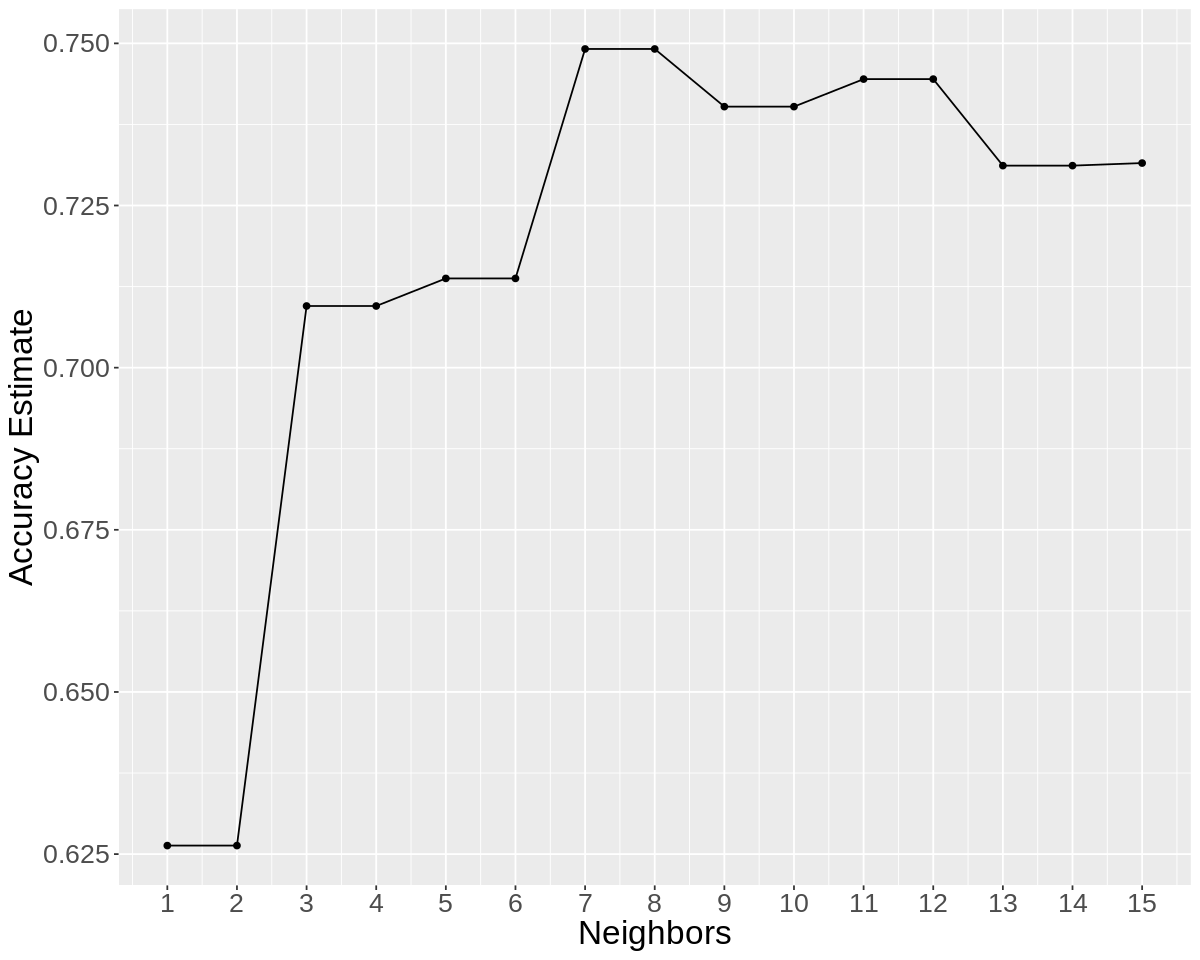

In [26]:
set.seed(9898)

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_vfold <- vfold_cv(heart_data_training_set, v = 5, strata = heart_disease_diagnosis)

kvals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

heart_results <- workflow() |>
                 add_recipe(heart_recipe) |>
                 add_model(heart_spec) |>
                 tune_grid(resamples = heart_vfold, grid = kvals) |>
                 collect_metrics()

accuracies <- heart_results |>
                 filter(.metric == 'accuracy')

heart_cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = 1:15)
heart_cross_val_plot

<font color = darkyellow>

*Graph 7.1: Line plot showing accuracy estimate with different k neighbors from 1 to 15.*

In [27]:
best_k_val <- accuracies |>
    arrange(desc(mean)) |>
    slice(1)
best_k_val

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.7491392,5,0.04017747,Preprocessor1_Model07


<font color = darkyellow>

*Table 7.2: Table showing the best k value for algorithm.*

Graph 7.1 above depicts a line graph when the accuracy estimate is plotted on the y axis and the value for k is plotted on the x axis. Table 7.2 above depicts the tibble highlighting the best value to use for k. From both the graph and table, it is evident that the value of k which will result in the highest accuracy model is 7.

<font color = purple>

#### *Creating the Model*

<font color = black>
    
We will now create the model with the optimal k value of 7 we retrieved from the information above.

In [28]:
heart_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
       set_engine("kknn") |>
       set_mode("classification")

heart_final_fit <- workflow() |>
             add_recipe(heart_recipe) |>
             add_model(heart_final_spec) |>
            fit(data = heart_data_training_set)
heart_final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(7,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3171806
Best kernel: rectangular
Best k: 7

<font color = darkblue>

## Results

<font color = green>
    
### *Testing the Model*
   
<font color = black>
    
We will now test the model with the testing set. This will allow us to determine the accuracy of our model.

In [29]:
heart_disease_predictions <- predict(heart_final_fit, heart_data_testing_set) |>
                        bind_cols(heart_data_testing_set)
heart_disease_predictions

.pred_class,age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
positive,67,160,286,108,1.5,positive
negative,56,130,256,142,0.6,positive
negative,52,172,199,162,0.5,negative
⋮,⋮,⋮,⋮,⋮,⋮,⋮
positive,45,110,264,132,1.2,positive
positive,68,144,193,141,3.4,positive
negative,57,130,131,115,1.2,positive


<font color = darkyellow>

*Table 8.1: Table showing the predicted heart disease diagnosis and true heart disease diagnosis in the testing set.*

In [30]:
heart_disease_predictions_data <- heart_disease_predictions |>
    mutate(heart_disease_diagnosis = case_when(heart_disease_diagnosis == "negative" ~ 0,
                                heart_disease_diagnosis == "positive" ~ 1)) |>
    mutate(.pred_class = case_when(.pred_class == "negative" ~ 0,
                                .pred_class == "positive" ~ 1))

heart_metrics <- heart_disease_predictions_data |> metrics(truth = heart_disease_diagnosis, estimate = .pred_class)
heart_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.58489765
rsq,standard,0.09656684
mae,standard,0.34210526


<font color = darkyellow>

*Table 8.2: Table showing accuracy statistics of the model on the heart disease testing dataset.*

In [33]:
heart_disease_preds <- heart_disease_predictions_data |>
    pull(.pred_class)

heart_disease_truth <- heart_disease_predictions_data |>
    pull(heart_disease_diagnosis)

heart_disease_preds_fac <- as_factor(heart_disease_preds)

heart_disease_truth_fac <- as_factor(heart_disease_truth)

heart_conf_mat_tibble <- tibble(heart_disease_preds_fac, heart_disease_truth_fac)

heart_conf_mat <- heart_conf_mat_tibble |>
                        conf_mat(truth = heart_disease_truth_fac, estimate = heart_disease_preds_fac) 

heart_conf_mat

          Truth
Prediction  0  1
         0 34 19
         1  7 16

<font color = darkyellow>

*Table 8.3: Confusion matrix of predicted and true heart disease diagnosis in the heart disease testing dataset.*

Table 8.3, the confusion matrix, depicts the number of predictions the model got correctly. In this case, the accuracy of the model would be 70%. This was calculated through taking the number of correct predictions shown above and dividing by the total number of predictions made. Specifically, the diagonal values above represent the predictions in which the model was correct. Correspondingly, if we take the sum of 34 and 16 and divide by the sum of 34, 16, 19, and 7, we get an estimate of 70% accuracy. 

<font color = green>
    
### *Visualization of Data Analysis*
   
<font color = black>
    
As shown by the confusion matrix, the k-nearest neighbors model had an accuracy of 70%. To further visualize how where the model inaccurately predicted the classification, scatterplots can be created, which demonstrate which points the model predicted incorrectly with respect to each of the 5 variables.

In [34]:
prediction_accuracy <- heart_disease_predictions |>
    mutate(correct_classification = .pred_class == heart_disease_diagnosis)

prediction_accuracy

.pred_class,age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis,correct_classification
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
positive,67,160,286,108,1.5,positive,TRUE
negative,56,130,256,142,0.6,positive,FALSE
negative,52,172,199,162,0.5,negative,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
positive,45,110,264,132,1.2,positive,TRUE
positive,68,144,193,141,3.4,positive,TRUE
negative,57,130,131,115,1.2,positive,FALSE


<font color = darkyellow>

*Table 9.1: Table specifying whether the model predicted the correct classification in the heart disease testing dataset.*

`summarise()` has grouped output by 'age', 'correct_classification'. You can
override using the `.groups` argument.


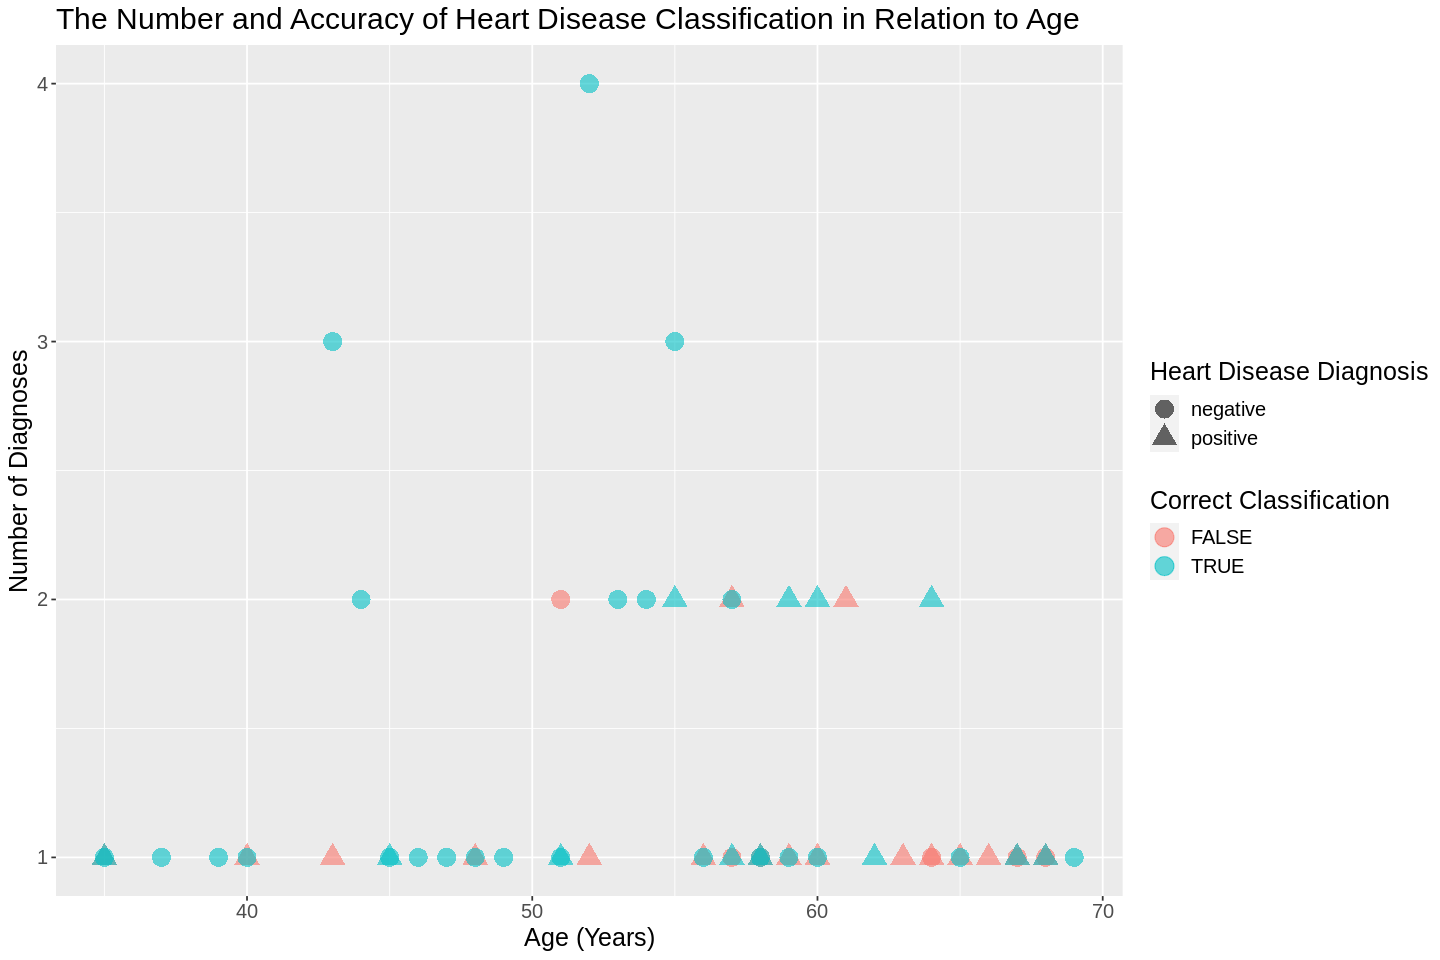

In [35]:
options(repr.plot.width = 12, repr.plot.height = 8)

prediction_age_accuracy <- prediction_accuracy |>
    select(age, correct_classification, heart_disease_diagnosis) |>
    group_by(age, correct_classification, heart_disease_diagnosis) |>
    summarize(count = n())

prediction_age_accuracy_visualization <- prediction_age_accuracy |>
    ggplot(aes(x = age, y = count, color = correct_classification, shape = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Age (Years)", y = "Number of Diagnoses", color = "Correct Classification", shape = "Heart Disease Diagnosis") +
    ggtitle("The Number and Accuracy of Heart Disease Classification in Relation to Age") +
    theme(text = element_text(size = 15))
prediction_age_accuracy_visualization

<font color = darkyellow>

*Table 9.2.1: Scatterplot visualizing the count of accuracy and diagnoses in relation to age.*

`summarise()` has grouped output by 'resting_blood_pressure',
'correct_classification'. You can override using the `.groups` argument.


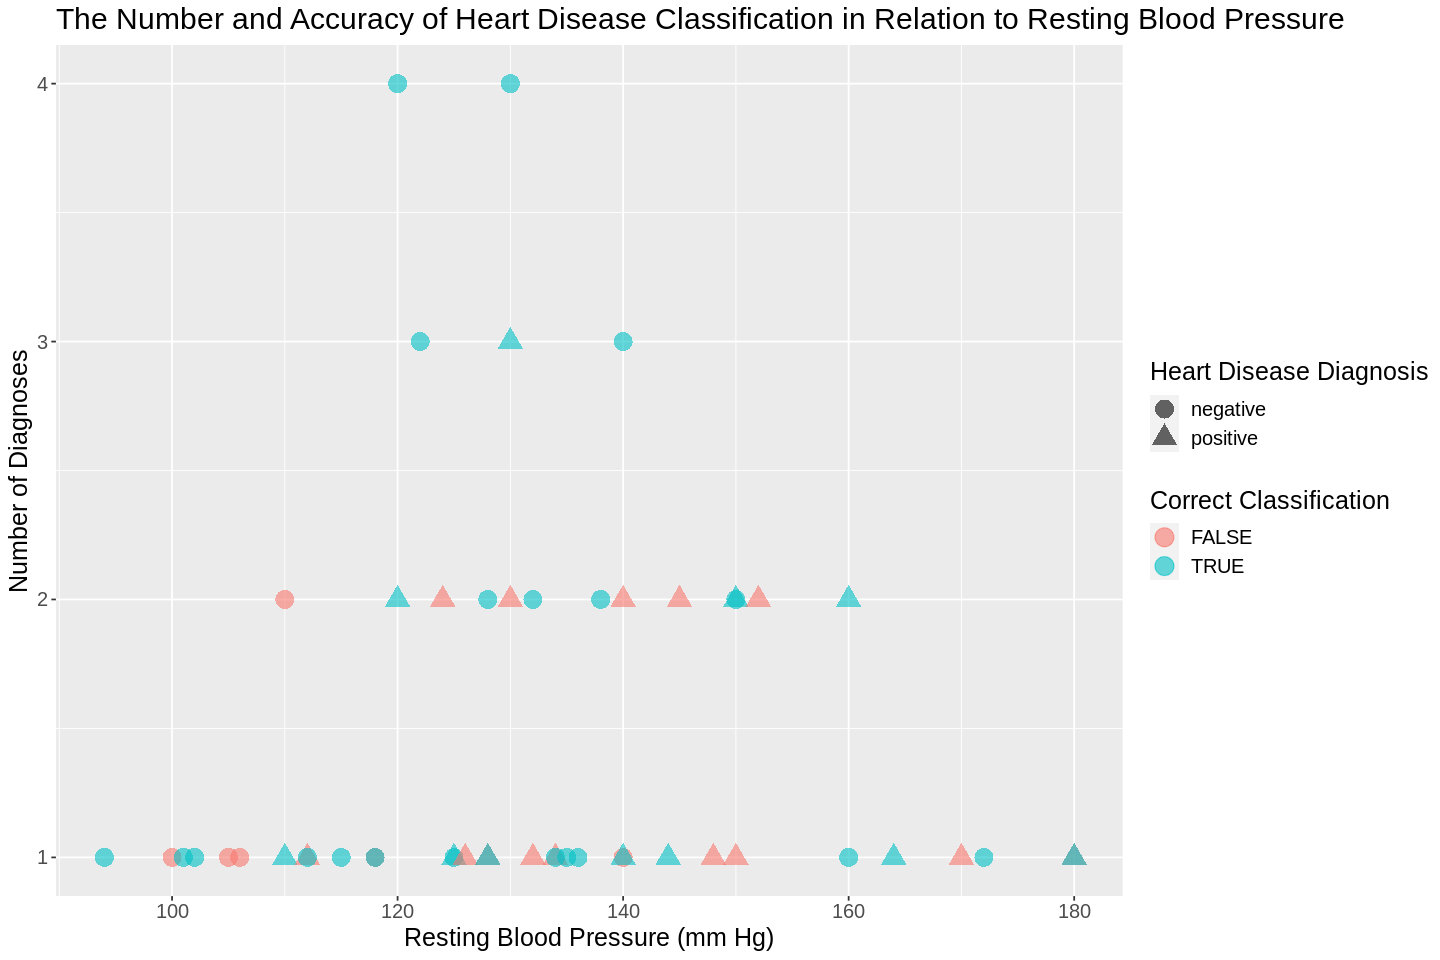

In [36]:
prediction_resting_blood_pressure_accuracy <- prediction_accuracy |>
    select(resting_blood_pressure, correct_classification, heart_disease_diagnosis) |>
    group_by(resting_blood_pressure, correct_classification, heart_disease_diagnosis) |>
    summarize(count = n())

prediction_resting_blood_pressure_accuracy_visualization <- prediction_resting_blood_pressure_accuracy |>
    ggplot(aes(x = resting_blood_pressure, y = count, color = correct_classification, shape = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Resting Blood Pressure (mm Hg)", y = "Number of Diagnoses", color = "Correct Classification", shape = "Heart Disease Diagnosis") +
    ggtitle("The Number and Accuracy of Heart Disease Classification in Relation to Resting Blood Pressure") +
    theme(text = element_text(size = 15))
prediction_resting_blood_pressure_accuracy_visualization

<font color = darkyellow>

*Table 9.2.2: Scatterplot visualizing the count of accuracy and diagnoses in relation to resting blood pressure.*

`summarise()` has grouped output by 'cholesterol', 'correct_classification'.
You can override using the `.groups` argument.


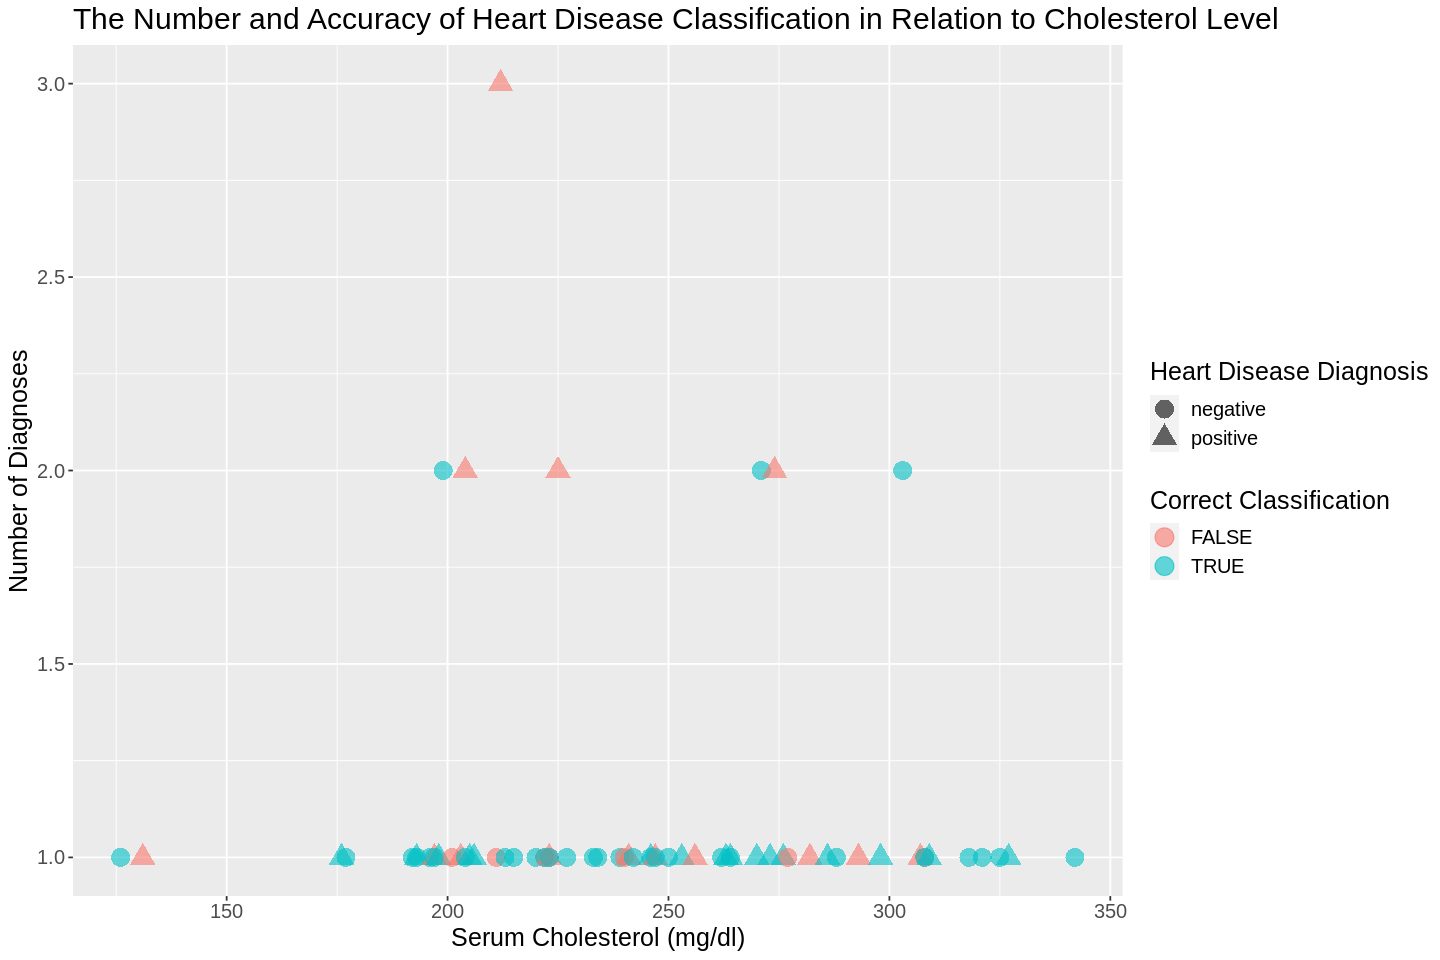

In [37]:
prediction_cholesterol_accuracy <- prediction_accuracy |>
    select(cholesterol, correct_classification, heart_disease_diagnosis) |>
    group_by(cholesterol, correct_classification, heart_disease_diagnosis) |>
    summarize(count = n())

prediction_cholesterol_accuracy_visualization <- prediction_cholesterol_accuracy |>
    ggplot(aes(x = cholesterol, y = count, color = correct_classification, shape = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Serum Cholesterol (mg/dl)", y = "Number of Diagnoses", color = "Correct Classification", shape = "Heart Disease Diagnosis") +
    ggtitle("The Number and Accuracy of Heart Disease Classification in Relation to Cholesterol Level") +
    theme(text = element_text(size = 15))
prediction_cholesterol_accuracy_visualization

<font color = darkyellow>

*Table 9.2.3: Scatterplot visualizing the count of accuracy and diagnoses in relation to cholesterol level.*

`summarise()` has grouped output by 'max_heart_rate', 'correct_classification'.
You can override using the `.groups` argument.


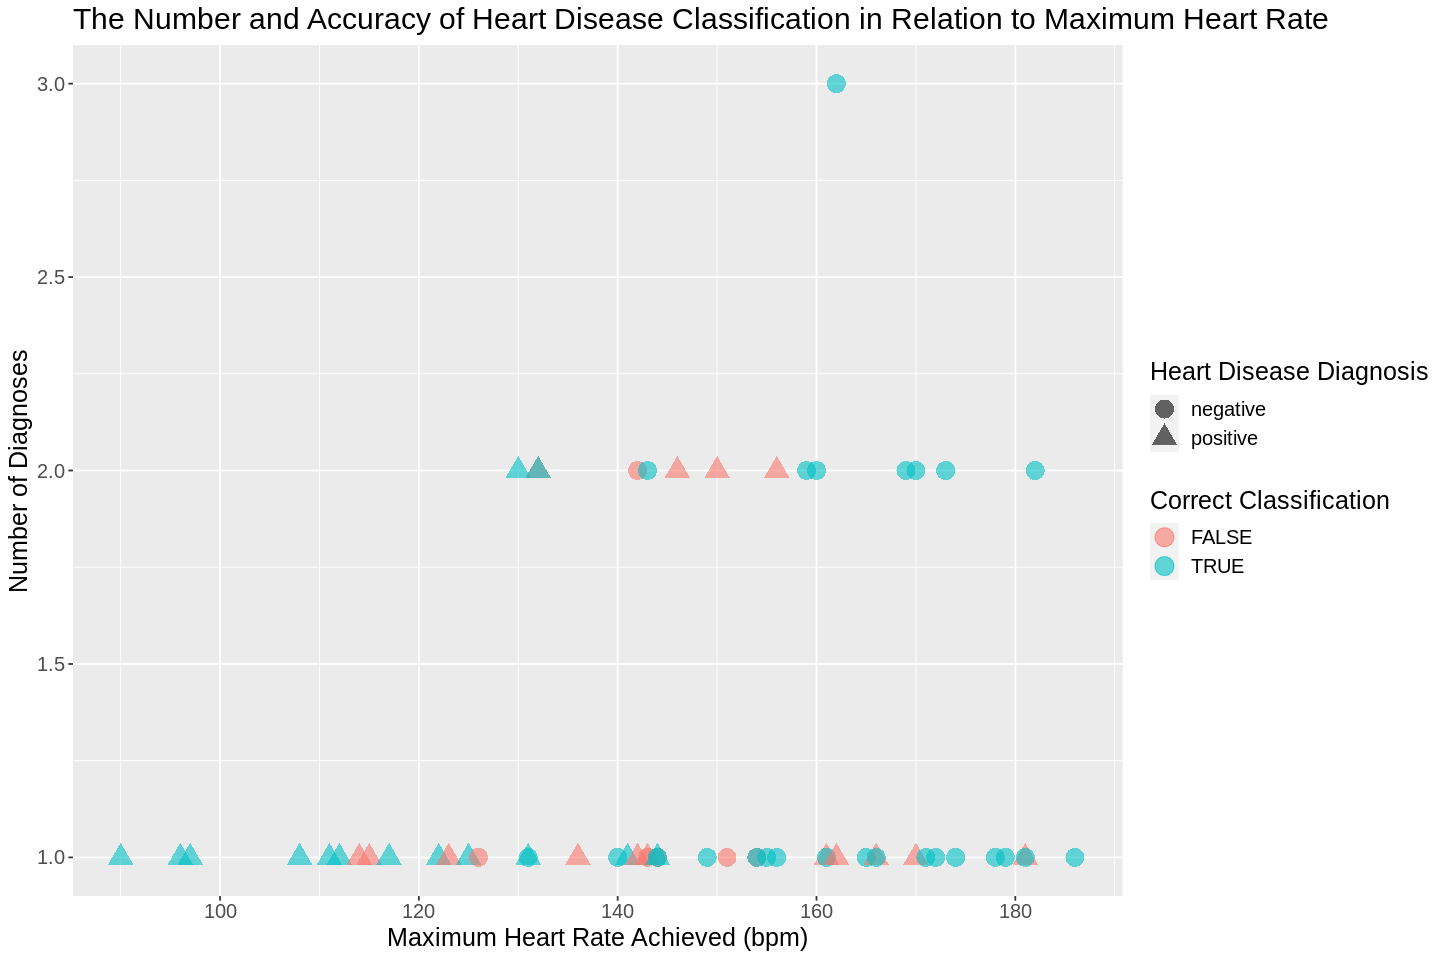

In [38]:
prediction_max_heart_rate_accuracy <- prediction_accuracy |>
    select(max_heart_rate, correct_classification, heart_disease_diagnosis) |>
    group_by(max_heart_rate, correct_classification, heart_disease_diagnosis) |>
    summarize(count = n())

prediction_max_heart_rate_accuracy_visualization <- prediction_max_heart_rate_accuracy |>
    ggplot(aes(x = max_heart_rate, y = count, color = correct_classification, shape = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Maximum Heart Rate Achieved (bpm)", y = "Number of Diagnoses", color = "Correct Classification", shape = "Heart Disease Diagnosis") +
    ggtitle("The Number and Accuracy of Heart Disease Classification in Relation to Maximum Heart Rate") +
    theme(text = element_text(size = 15))
prediction_max_heart_rate_accuracy_visualization

<font color = darkyellow>

*Table 9.2.4: Scatterplot visualizing the count of accuracy and diagnoses in relation to maximum heart rate achieved.*

`summarise()` has grouped output by 'depression', 'correct_classification'. You
can override using the `.groups` argument.


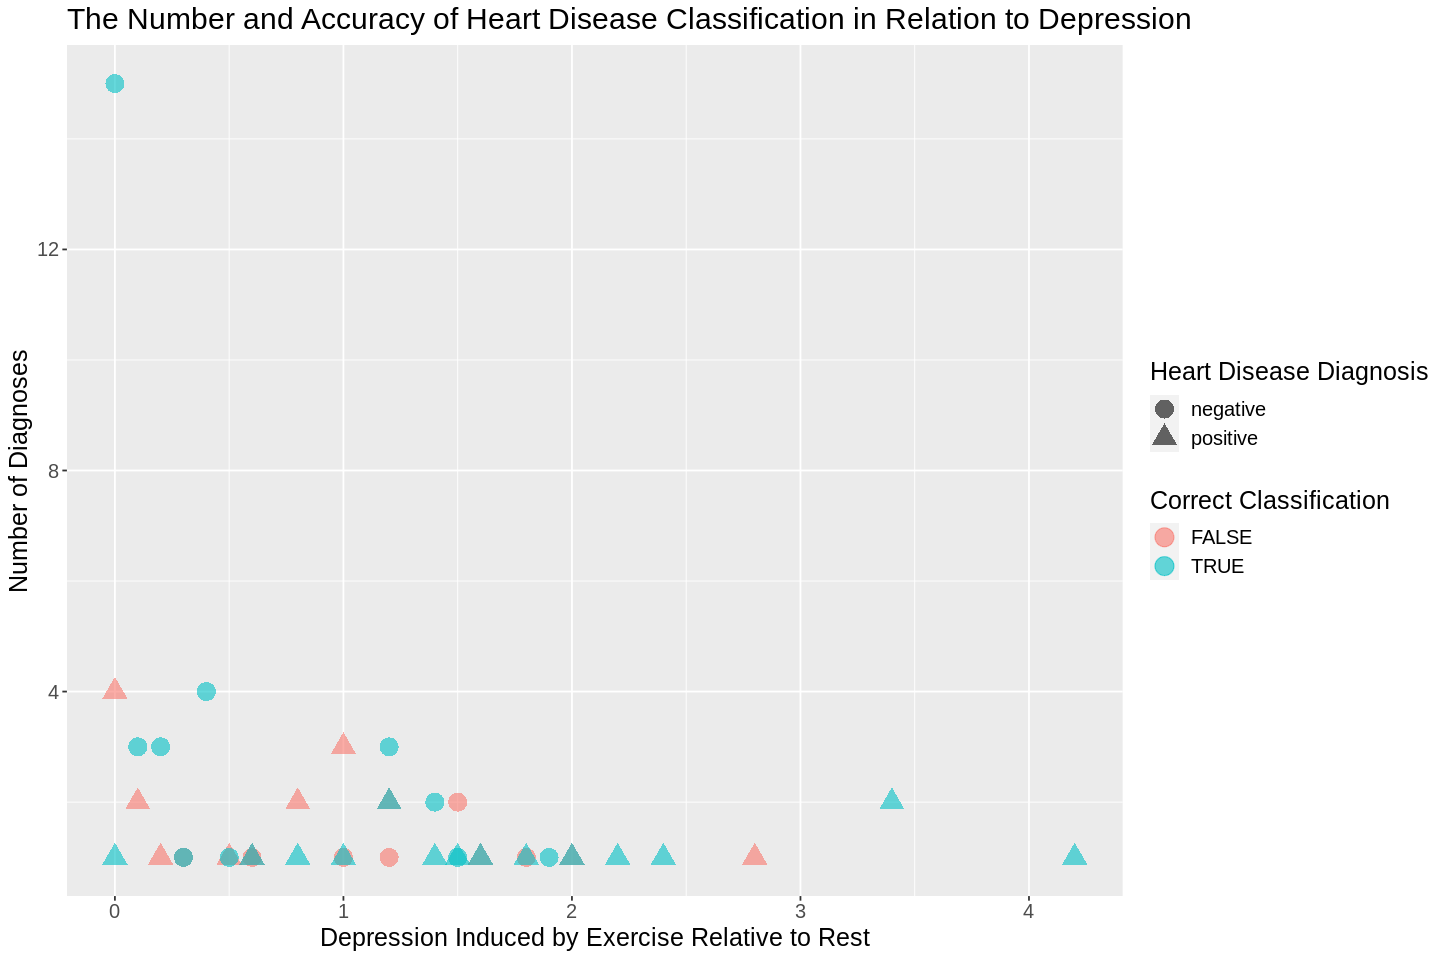

In [39]:
prediction_depression_accuracy <- prediction_accuracy |>
    select(depression, correct_classification, heart_disease_diagnosis) |>
    group_by(depression, correct_classification, heart_disease_diagnosis) |>
    summarize(count = n())

prediction_depression_accuracy_visualization <- prediction_depression_accuracy |>
    ggplot(aes(x = depression, y = count, color = correct_classification, shape = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Depression Induced by Exercise Relative to Rest", y = "Number of Diagnoses", color = "Correct Classification", shape = "Heart Disease Diagnosis") +
    ggtitle("The Number and Accuracy of Heart Disease Classification in Relation to Depression") +
    theme(text = element_text(size = 15))
prediction_depression_accuracy_visualization

<font color = darkyellow>

*Table 9.2.5: Scatterplot visualizing the count of accuracy and diagnoses in relation to depression induced by exercise relative to rest.*

ADD SUMMARY OF SCATTERPLOTS HERE

<font color = darkblue>

## Discussion

<font color = green>
    
### *Summary of Results*
   
<font color = black>
    
Nowadays, heart disease is the leading cause of death globally, with nearly 20 million people dying from heart diseases in 2017, a number far higher than the COVID-19 pandemic that ravaged the world. Cardiovascular disease (CVD) is a general term for heart diseases, including various types such as rheumatic heart disease, congenital heart disease, hypertensive heart disease, coronary heart disease, myocarditis, etc. Our analysis indicates that Age, Cholesterol, Depression, MHR (Max Heart Rate), and RBP (Resting Blood Pressure) are the top 5 predictor variables for heart diseases, achieving a 70% accuracy level as shown in Table (8.3.).

<font color = green>
    
### *Results vs Expectation*
   
<font color = black>
    
According to research conducted by Peking University, researchers analyzed the corresponding symptoms of five major types of heart disease in the article. Except for congenital heart disease, the researchers used age, heart rate, blood pressure, and cholesterol as the main indicators for diagnosing the presence of heart disease when analyzing the other four major types of heart disease (Guo et al., 2021). 

Another article, which studied the use of machine learning techniques for diagnosing heart disease, also selected age, heart rate, blood pressure, and cholesterol levels as predictive indicators. The researchers applied various algorithms such as the NAÏVE BAYES METHOD and SUPPORT VECTOR MACHINES (SVM) to improve the credibility of using the above four predictor variables for diagnosing heart disease (Parthiban & K. Srivatsa, 2012).

However, very few studies have investigated depression induced by exercise relative to rest as an independent predictor variable when studying predictors for diagnosing heart disease. Based on the aforementioned research, we expect that the five predictor variables listed in our proposal can demonstrate good accuracy in diagnosing heart disease. Meanwhile, we speculate that among all five variables, the contribution of depression induced by exercise relative to rest in this model may be relatively smaller than that of the other four variables. 

As a result, the conclusion drawn from our analysis using machine learning algorithms is consistent with our predictions. The only slightly surprising thing is that the accuracy of the classification results did not reach our expectations completely. Although 70% accuracy is sufficient to demonstrate the effectiveness of the selected predictor variables in diagnosing cardiovascular disease, we still hope to improve the accuracy of the classification model by optimizing the algorithm logic and selecting more reasonable predictors.

<font color = green>
    
### *Impact of Findings*
   
<font color = black>

By wrangling and analyzing the dataset's variables, we could examine their correlation with each other in detail. Through our findings we aim to revolutionize healthcare by enabling early and precise diagnosis of heart disease based on specific predictor traits, leading to targeted treatment for at-risk patients.
Future research could explore whether other machine learning algorithms could predict heart disease diagnoses with even higher accuracy or whether there are additional predictor variables that could enhance the model's performance. Investigating if the same predictors are informative for various subpopulations could also be valuable. (e.g., age, gender, or ethnicity). Overall, this analysis offers a basis for further investigation and improvement of models for diagnosing heart disease.

<font color = green>
    
### *Future Questions*
   
<font color = black>

Could machine learning algorithms be accurate enough to innovate the medical industry?
What happens when the algorithm gives a patient a false diagnosis? 
How would this affect the availability and cost of health care around the world?

<font color = darkblue>
    
## References
   
<font color = black>

Guo, Z. N., Liang, Z. S., Zhou, Y., Zhang, N., & Huang, J. (2021, June 18). Genetic study of cardiovascular disease subtypes defined by International Classification of Diseases. Beijing da xue xue bao. Yi xue ban = Journal of Peking University. Health sciences. Retrieved April 11, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8220055/ 
    
Parthiban, G., & K. Srivatsa, S. (2012). Applying machine learning methods in diagnosing heart disease for diabetic patients. International Journal of Applied Information Systems, 3(7), 25–30. https://doi.org/10.5120/ijais12-450593 

UCI Machine Learning Repository: Heart disease data set. (n.d.). Retrieved April 11, 2023, from https://archive.ics.uci.edu/ml/datasets/Heart%20Disease 
